<font size = 6>Nashpy VS quantecon</font>

In [ ]:
# install the tools you will use later
!pip install --upgrade setuptools
!pip install --upgrade pip
!pip install nashpy
!pip install quantecon

     |████████████████████████████████| 819kB 9.3MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: setuptools 57.0.0
    Uninstalling setuptools-57.0.0:
      Successfully uninstalled setuptools-57.0.0


     |████████████████████████████████| 1.6MB 8.5MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
  Created wheel for nashpy: filename=nashpy-0.0.21-py3-none-any.whl size=15281 sha256=8298433d0cc2a2aaf3738faeb3920fa51f3c625e3eb695b8bc9be573b10d78a7
  Stored in directory: /root/.cache/pip/wheels/02/08/62/cf4fa931e0a317d180936b266169a57f4bb4eb801465bbe8a1
Successfully built nashpy
     |████████████████████████████████| 240 kB 8.2 MB/s 


<font face = Times size=4>

***Nashpy and QuantEcon:***

Previously, we have used Nashpy many times to solve for the Nash equillibrium.Nashpy is a powerful Python library which is widely used in solving game theory problems. 

Now, we are going to introduce a new Python package called QuantEcon. QuantEcon is a NumFOCUS fiscally sponsored project dedicated to development and documentation of modern open source computational tools for economics, econometrics, and decision making. They provide a tool called QuanEcon.py which enables us to access to the service they provide easily with Python code.

In the following part, we will review the usage of Nashpy and then give instructions of how to use QuantEcon for solving game theory problems.
    
</font>

---

<font face = Times size = 4>
    
***Example - Battle of sex:***

</font>

<div align="center">
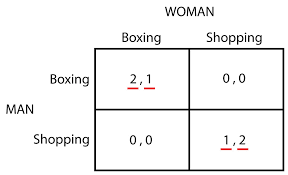
    </div>
<font face = Times size = 3>
    <center> Fig: Battle of sex </center>
    </font>




<font face = Times size = 4>
    
***Question:*** What is the equilibrium strategy profile?

</font>

<font face = Times size=4>

***Using Nashpy:***
    
</font>

In [ ]:
import nashpy as nash
import numpy as np

# Creater the game with the payoff matrix

A = np.array([[2, 0],
              [0, 1]]) # A is the row player (in this case, prisoner)

B = np.array([[1, 0],
              [0, 2]]) # B is the column player

In [ ]:
# Form the game
game2 = nash.Game(A,B)
game2

Bi matrix game with payoff matrices:

Row player:
[[2 0]
 [0 1]]

Column player:
[[1 0]
 [0 2]]

In [ ]:
# Find the Nash Equilibrium with Support Enumeration
equilibria = game2.support_enumeration()
for eq in equilibria:
    print(eq)

(array([1., 0.]), array([1., 0.]))
(array([0., 1.]), array([0., 1.]))
(array([0.66666667, 0.33333333]), array([0.33333333, 0.66666667]))


<font face = Times size = 4>

***Interpretation of the results:*** 
    
In the output of Nashpy, each tuple represents a strategy set. The first two tuples represent the pure strategy NE, which are TOP LEFT and BOTTOM RIGHT. The third tuple shows the mixed strategy NE.
    
</font>

<font face = Times size = 4>

***Using QuantEcon:*** 
    
</font>

<font face = Times size = 4>

***Form the game:*** In the following part, three ways to form a game will be shown.
    
</font>

In [ ]:
# import the QuantEcon package
import quantecon.game_theory as gt
import numpy as np

# The first way to form the game: by the payoff matrix
prisoner_dilemma_matrix = np.array([[(2, 1), (0, 0)],
                                    [(0, 0), (1, 2)]])

g_PD = gt.NormalFormGame(prisoner_dilemma_matrix)
print(g_PD)

2-player NormalFormGame with payoff profile array:
[[[2, 1],  [0, 0]],
 [[0, 0],  [1, 2]]]


In [ ]:
# The second way to form the game: by players
player0 = gt.Player([[2, 0],
                     [0, 1]])

# Please pay attention to the difference here!!!
player1 = gt.Player([[1, 0],
                     [0, 2]])

# Pass in the two players
g_PD = gt.NormalFormGame((player0, player1))
print(g_PD)

2-player NormalFormGame with payoff profile array:
[[[2, 1],  [0, 0]],
 [[0, 0],  [1, 2]]]


In [ ]:
# the third way to form the game: by actions (Not recommanded)

# 2 players, each of whom has 2 actions
g_PD = gt.NormalFormGame((2, 2))
g_PD[0, 0] = 2, 1
g_PD[0, 1] = 0, 0
g_PD[1, 0] = 0, 0
g_PD[1, 1] = 1, 2

print(g_PD)

2-player NormalFormGame with payoff profile array:
[[[2., 1.],  [0., 0.]],
 [[0., 0.],  [1., 2.]]]


<font face = Times size = 4>

***Short Summay:*** 
    
There are three ways to form a game using QuantEcon. Personally I will recommand you to use the first way (directly pass in the payoff matrix). This is the most intuitive way. Also, if you used to use Nashpy, the logic of forming a game by Nashpy and by QuantEcon are different, please pay attention to that.

</font>

<font face = Times size = 4>

***Find the Nash equilibrium:*** 
    
In the following part, we will introduce three simple function to find the Nash equilibrium.

    
</font>

In [ ]:
# Finding the Nash equilibrium: pure_nash_brute

NE = gt.pure_nash_brute(g_PD)
print(NE)

[(0, 0), (1, 1)]


In [ ]:
# Finding the Nash equilibrium: support_enumeration

NE = gt.support_enumeration(g_PD)
print(NE)

[(array([1., 0.]), array([1., 0.])), (array([0., 1.]), array([0., 1.])), (array([0.66666667, 0.33333333]), array([0.33333333, 0.66666667]))]


In [ ]:
NE = gt.vertex_enumeration(g_PD)
print(NE)

[(array([1., 0.]), array([1., 0.])), (array([0., 1.]), array([0., 1.])), (array([0.66666667, 0.33333333]), array([0.33333333, 0.66666667]))]


<font face = Times size = 4>

***Short Summay:*** 
    
We introduced three way to solve for the Nash equilibrium. Pure_nash_brute is able to return the pure strategy NE. Support_enumeration and vertex_enumeration both computes mixed-action Nash equilibria of a 2-player normal form game by enumeration and matching of vertices of the best response polytopes, but the latter seems to run faster than the former.

</font>